
🔍 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxi

C:\Users\Monkey D Luffy\AppData\Local\Temp\ipykernel_76\51978594.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Type", data=df, palette="coolwarm")
C:\Users\Monkey D Luffy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


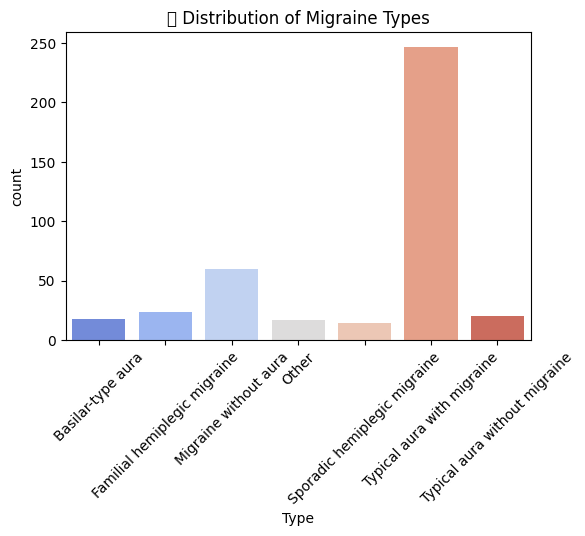

C:\Users\Monkey D Luffy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


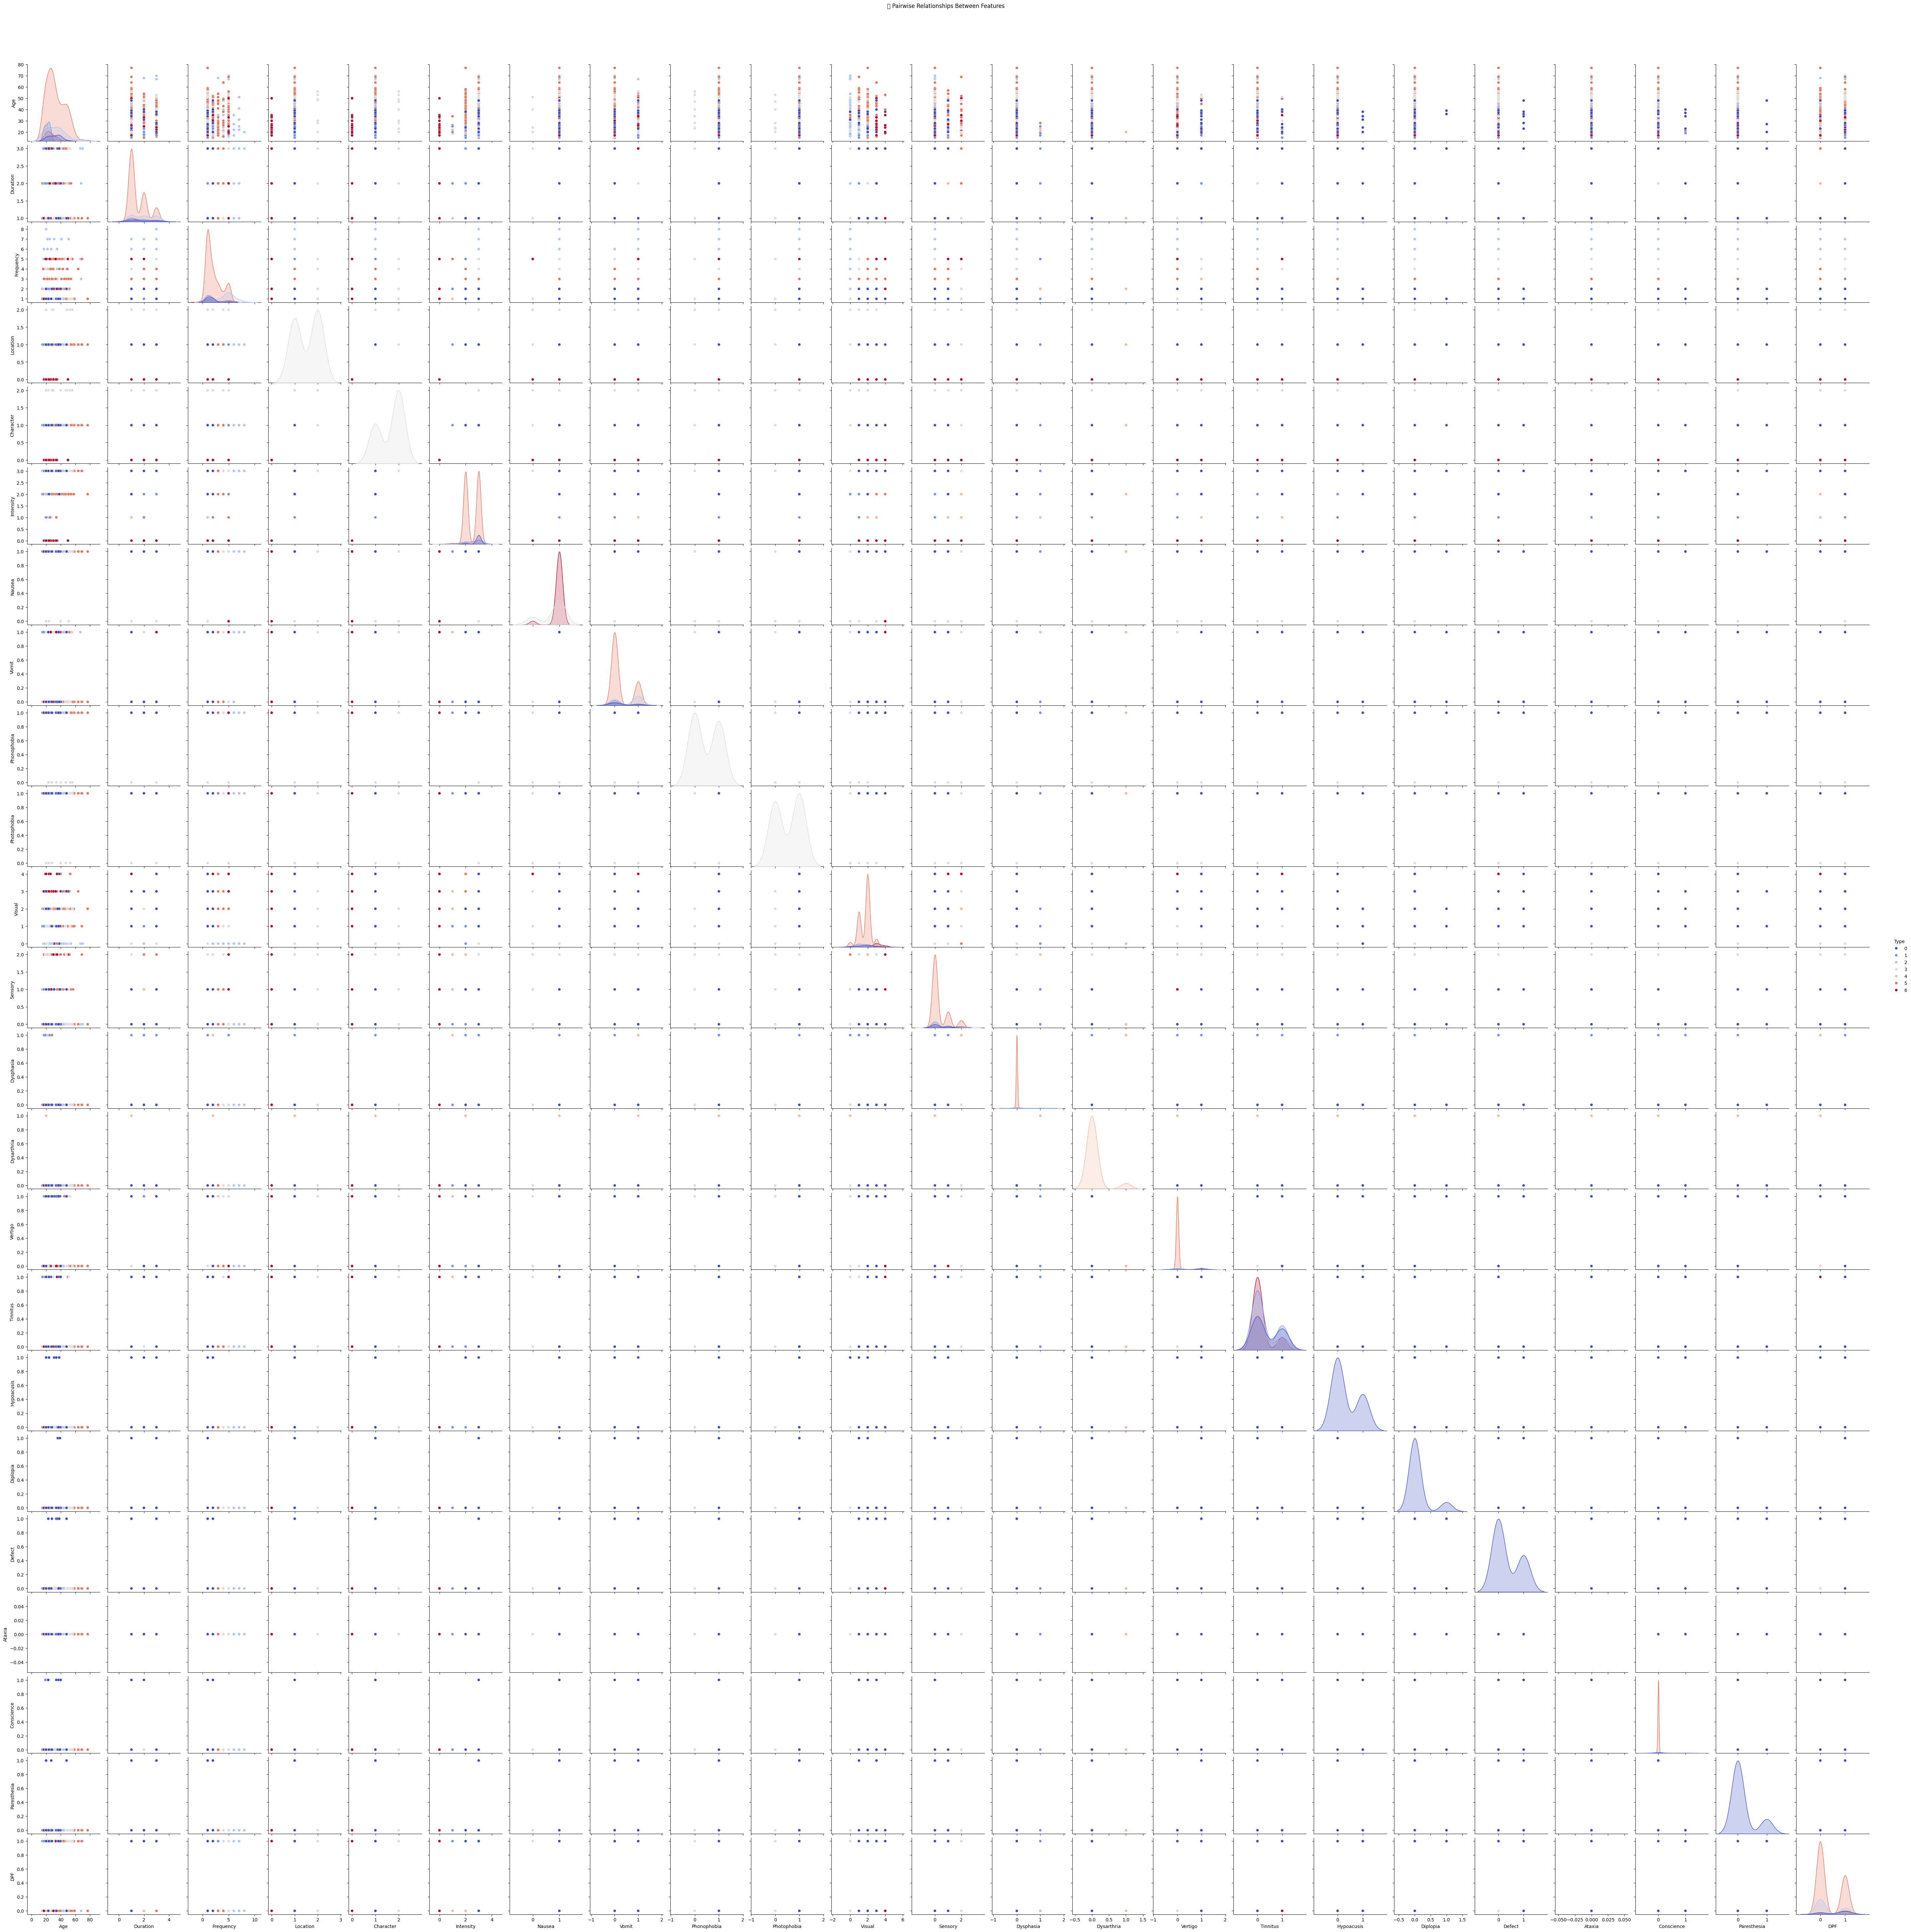

C:\Users\Monkey D Luffy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


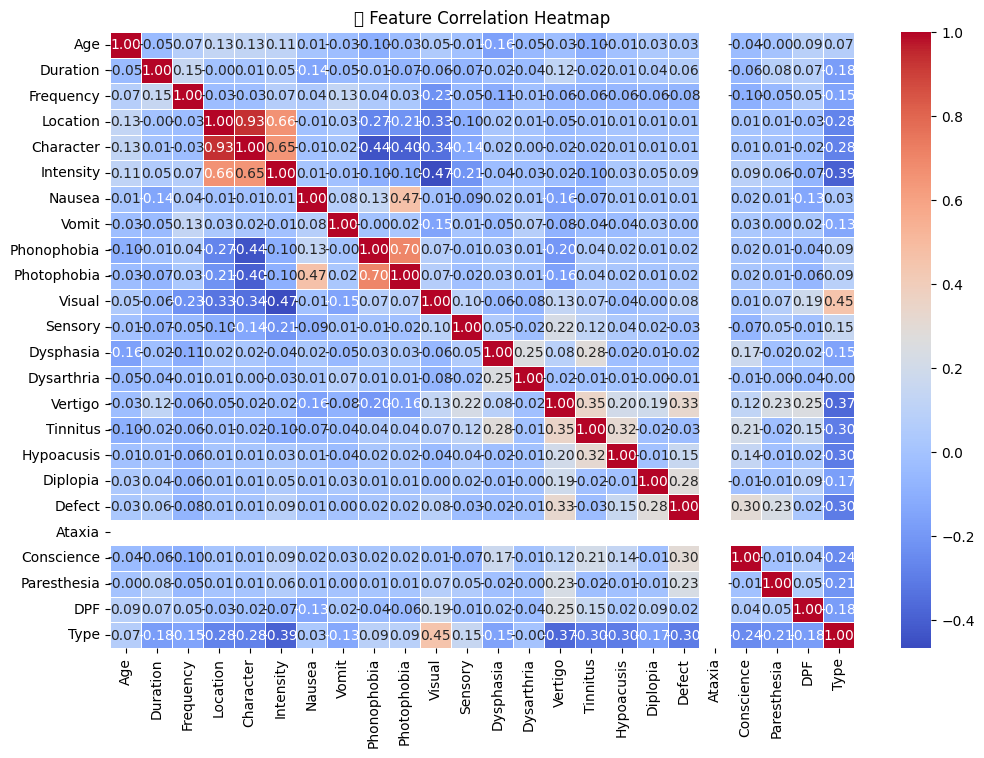

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("migraine_symptom_classification.csv")

# Display basic info
print("\n🔍 Dataset Information:")
print(df.info())

# Check for missing values
print("\n❌ Missing Values per Column:")
print(df.isnull().sum())

# Convert categorical 'Type' column to numeric values
le = LabelEncoder()
df["Type"] = le.fit_transform(df["Type"])  # Assign unique numeric values to each migraine type

# Fill missing values with column mean (if needed)
df.fillna(df.mean(), inplace=True)

# Summary statistics
print("\n📊 Summary Statistics:")
print(df.describe())

# Visualize migraine type distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Type", data=df, palette="coolwarm")
plt.title("🧠 Distribution of Migraine Types")
plt.xticks(range(len(le.classes_)), le.classes_, rotation=45)  # Map numeric labels back to migraine types
plt.show()

# Pairplot to visualize feature relationships
sns.pairplot(df, hue="Type", diag_kind="kde", palette="coolwarm")
plt.suptitle("🔎 Pairwise Relationships Between Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("🔥 Feature Correlation Heatmap")
plt.show()


# 🤖 Machine Learning (ML) Code Block
This block builds classification models to predict migraine types.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("migraine_symptom_classification.csv")

# Encode target variable (categorical to numeric)
le = LabelEncoder()
df["Type"] = le.fit_transform(df["Type"])

# Separate features and target
X = df.drop(columns=["Type"])
y = df["Type"]

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
models = {
    "🚀 Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "📈 Logistic Regression": LogisticRegression(max_iter=1000),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))



🚀 Gradient Boosting Accuracy: 0.93
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      0.67      0.80         3
           2       0.93      1.00      0.96        13
           3       1.00      1.00      1.00         4
           4       0.00      0.00      0.00         2
           5       0.94      0.96      0.95        49
           6       1.00      1.00      1.00         3

    accuracy                           0.93        80
   macro avg       0.84      0.78      0.80        80
weighted avg       0.93      0.93      0.92        80


📈 Logistic Regression Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         4
           4       0.33      0.50      0.40         2
    